In [4]:
#import necessary libraries
import warnings # Supress Warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [5]:
#set to show all cols and rows
pd.options.display.max_rows=None
pd.options.display.max_columns=None

In [91]:
carprice=pd.read_csv('CarPrice_Assignment.csv')
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# Check the columns in the dataframe
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [90]:
#Check the sahpe of the dataframe
carprice.shape

(205, 46)

In [7]:
# Check min and max of numnerical columns using describe
carprice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [46]:
#Check if there are any duplicates in the carprice data set
carprice.loc[carprice.duplicated()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company


In [92]:
#Split the Car name and get the company name from the column
company= carprice["CarName"].str.split(" ",n=1,expand=True)
carprice["Company"]=company[0]
carprice.head(20)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000,audi
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000,audi
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000,audi
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000,audi
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000,audi
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167,audi


In [93]:
#drop carname after splitting the compnay name. It is clear from the instructions that only compnay name will be considered to model data
carprice.drop(['CarName'], axis = 1, inplace = True)
#drop car_id as it is just a unique id given for a row and there is no need to consider it as a predictor.
carprice.drop(['car_ID'], axis = 1, inplace = True)
carprice.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [78]:
#Check is there are any missing values in the columns
carprice.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
Company             0
dtype: int64

In [95]:
#Check the number of unique values in Company column
carprice.Company.nunique()

22

In [33]:
#Check count of each value
carprice.Company.value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
volkswagen     12
peugeot        11
volvo          11
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
chevrolet       3
jaguar          3
alfa-romero     3
renault         2
mercury         1
Name: Company, dtype: int64

In [94]:
#Treat duplicate company names
carprice.replace('toyouta', 'toyota', inplace=True)
carprice.replace('Nissan', 'nissan', inplace=True)
carprice.replace(['vw','vokswagen'], 'volkswagen', inplace=True)
carprice.replace('porcshce', 'porsche', inplace=True)
carprice.replace('maxda', 'mazda', inplace=True)

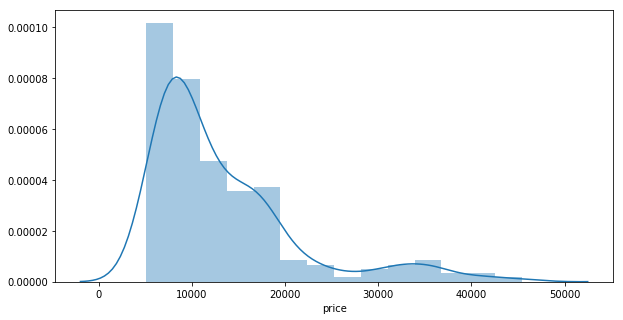

In [11]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.distplot(carprice.price)
#Plot a graph to check if the data is normally distributed

In [51]:
#Check the price column in detail for mean and median
carprice.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

#### From the above distribution plot and looking at the mean and median data on pricing we can see that there is significant differene in mean and median values. Majority of the data points are below 17K

### Data Visualization

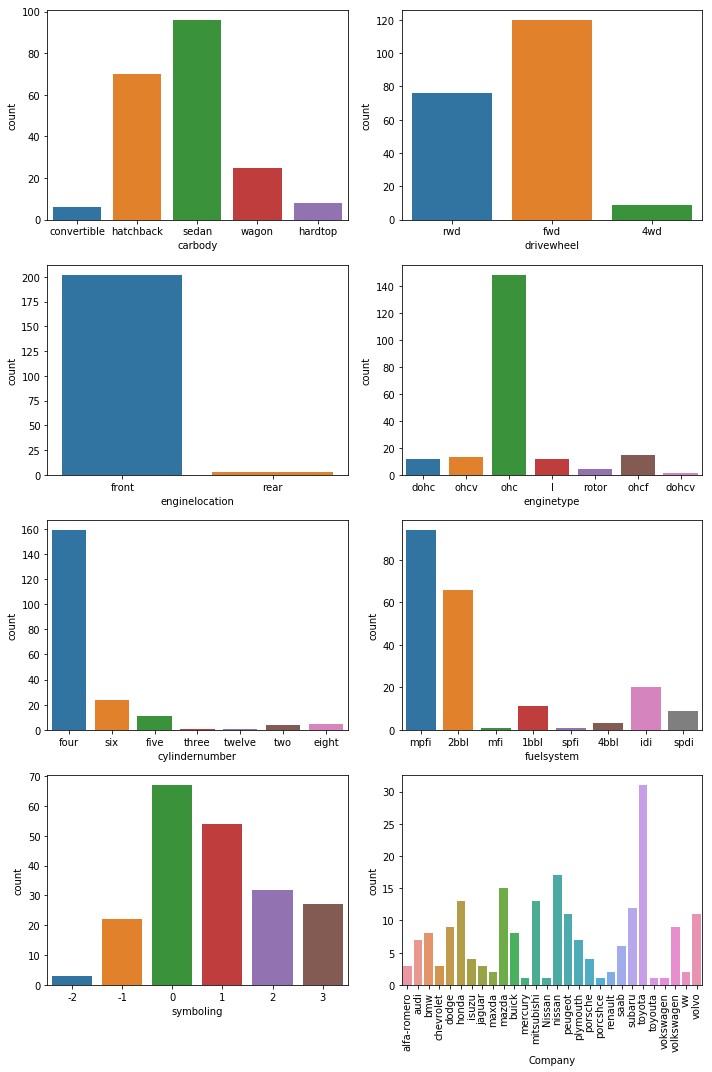

In [123]:
## Plot Count plots for a few categorical variables
categorical=['carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem','symboling','Company']
fig, ax = plt.subplots(4, 2, figsize=(10, 15))
fig.tight_layout()

for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(x=variable, data=carprice, ax=subplot)
    plt.xticks(rotation='vertical')
    fig.tight_layout()

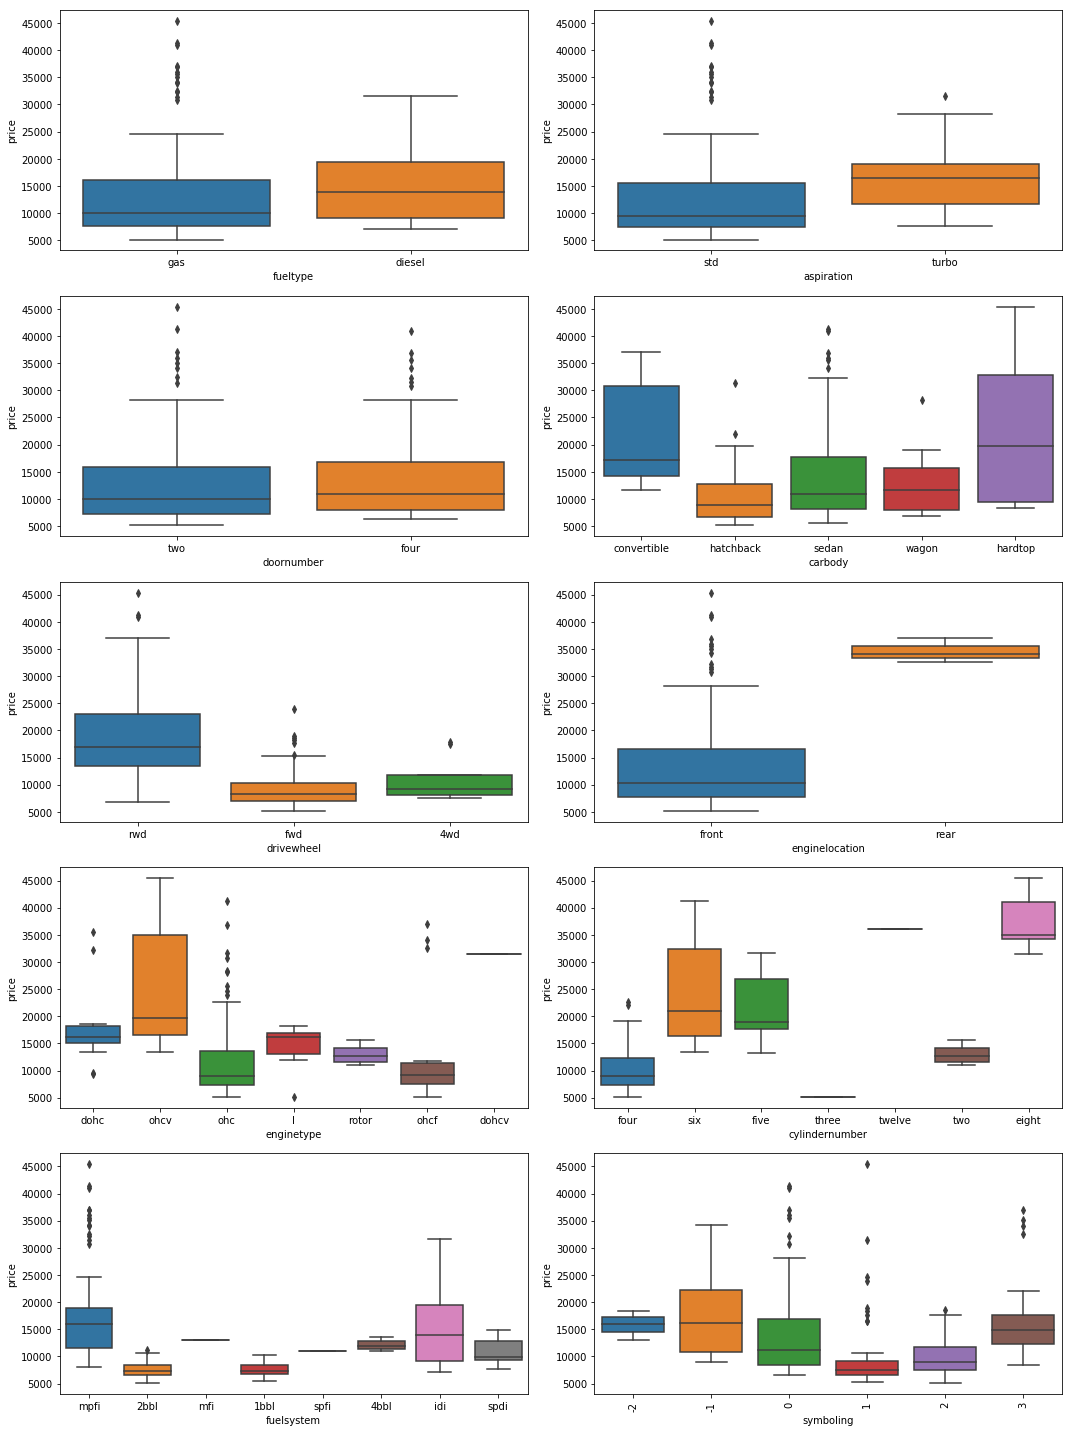

In [122]:
#Plot boxplots for a few categorical variables with respect to price
categorical=['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem','symboling']
fig, ax = plt.subplots(5,2, figsize=(15, 20))
fig.tight_layout()

for variable, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=variable, y='price', data=carprice, ax=subplot)
    plt.xticks(rotation='vertical')
    fig.tight_layout()

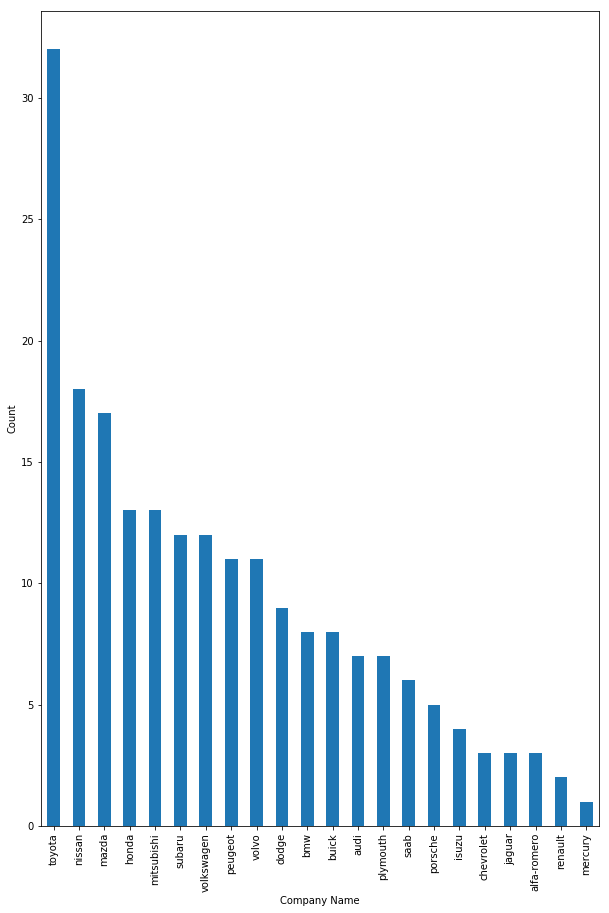

In [77]:
#Plot barplot to count the number of company names in the data set
plt.figure(figsize=(10,15))
a=carprice.Company.value_counts().plot('bar')
a.set(xlabel = 'Company Name', ylabel='Count')
plt.show()

#### Observations on the above categorical data-
#### 1. Diesel cars has higher mean price when compared to Gas
#### 2. Turbo aspirators seem to have higher average price when compared to std but std do seem to have a few higher priced cars when compared to turbo 
#### 3. Nothing much to note regarding turbo. They seem to have almost same mean price.
#### 4. Hardtop carbody has the highest average price when compared to others. Although covertible also contributes to the higher priced cars. Hatchback, sedan and Wagon are moderately priced.
#### 5. Significant difference in the average price of rwd when compared to fwd and 4wd. Higher priced cars favor rwd over the other two.
#### 6. ohcv engine type seems to be highest priced cars when compared to other categories. But ohc seems to be more popular as majority cars have ohc engine type.
#### 7. From the countplot it is evident that majority of the engine locations are in the front.
#### 8. Four seems to be the most popular cylinder in the cars which can be confirmed in the countplot but cars with eight cylinders are priced the highest.
#### 9. mpfi and 2bbl are the most popular fuel systems and mpfi & idi have higher average means than others.
#### 10. Toyota is the most popular brand of cars in the dataset followed by Nissan and Mazda

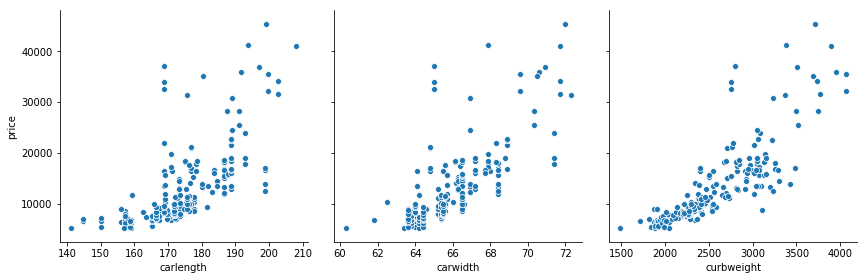

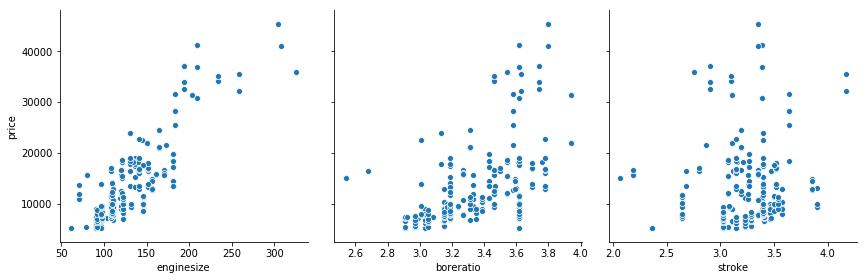

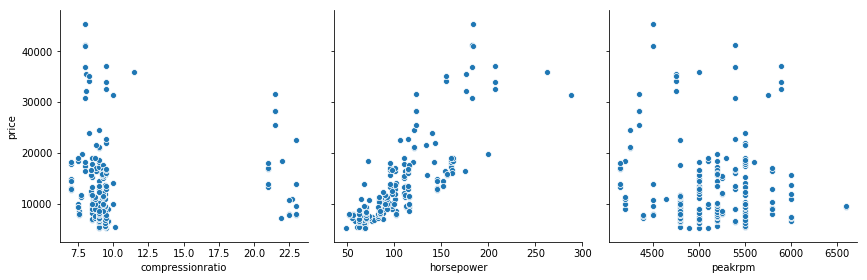

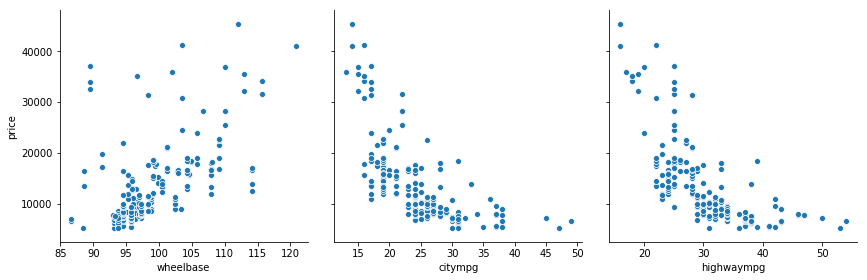

In [83]:
#Create pairplot function to visually analyze numeric variables
def pairplot(a,b,c):
    sns.pairplot(carprice, x_vars=[a,b,c], y_vars='price',height=4, aspect=1, kind='scatter')
    plt.show()

pairplot('carlength', 'carwidth', 'curbweight')
pairplot('enginesize', 'boreratio', 'stroke')
pairplot('compressionratio', 'horsepower', 'peakrpm')
pairplot('wheelbase', 'citympg', 'highwaympg')

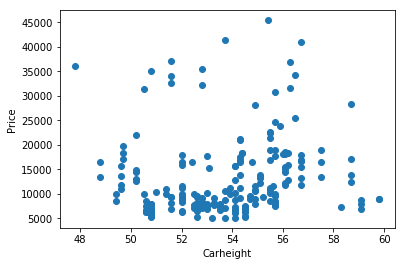

In [103]:
plt.scatter(carprice['carheight'],carprice['price'])
plt.ylabel('Price')
plt.xlabel('Carheight')
plt.show()

### Observations from the above pairplots
#### 1. Carlength, Carwidth, curbweight seems to have a trend line which shows positive correlation with price
#### 2. enginesize, boreratio, horsepower, wheelbase show trendline towards positive correlation
#### 3. citympg, highwaympg show trendline towards negative correlation
#### 4. Stroke, compressionratio, peakrpm, carheight do not show any signifact trend.

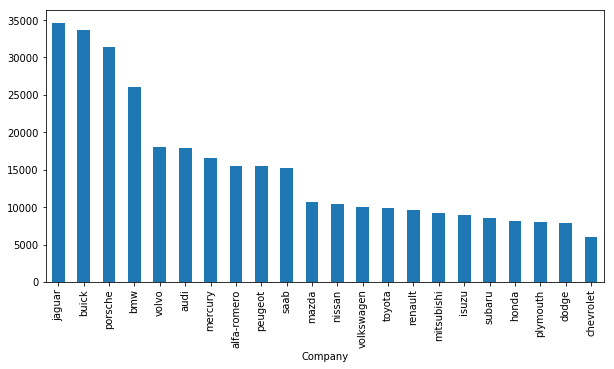

In [96]:
#Plot the average price of the car based on compnay
plt.figure(figsize=(10,5))
pricegroup=carprice.groupby(['Company'])['price'].mean().sort_values(ascending=False)
pricegroup.plot.bar()
plt.xticks(rotation=90)
plt.show()

In [97]:
#calculate the average price of the car based on company and bin them to high medium low
bins = [0,10000,20000,40000]
labels = ['Low','Medium','High']
test=pd.cut(carprice.groupby(['Company'])['price'].mean(),bins=bins, labels=labels)
carprice= (pd.merge(carprice, test, on='Company', how='left'))
carprice.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price_x,Company,price_y
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,Medium
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,Medium
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Medium
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,Medium
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,Medium


In [98]:
carprice.rename(columns={"price_x": "price", "price_y": "comppricerange"},inplace=True)
carprice.head(200)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,comppricerange
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,13495.000,alfa-romero,Medium
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,16500.000,alfa-romero,Medium
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.470,9.00,154,5000,19,26,16500.000,alfa-romero,Medium
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.400,10.00,102,5500,24,30,13950.000,audi,Medium
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.400,8.00,115,5500,18,22,17450.000,audi,Medium
5,2,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,15250.000,audi,Medium
6,1,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,17710.000,audi,Medium
7,1,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,18920.000,audi,Medium
8,1,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.400,8.30,140,5500,17,20,23875.000,audi,Medium
9,0,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.400,7.00,160,5500,16,22,17859.167,audi,Medium


In [85]:
#Create list of categorical variables using nunique to see how many have unique values each column has.
catvar=['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem','Company']
for c in catvar:
    print(c)
    print (carprice[c].nunique())

fueltype
2
aspiration
2
doornumber
2
carbody
5
drivewheel
3
enginelocation
2
enginetype
7
cylindernumber
7
fuelsystem
8
Company
22


In [99]:
# From the above we can conclude the following have 2 values Fueltype, aspiration , doornumber, enginelocation
# Map the variables for encoding
fuel=carprice.fueltype.map({'gas': 0, 'diesel': 1})
carprice['fueltype']=fuel

asp=carprice.aspiration.map({'std': 0, 'turbo': 1})
carprice['aspiration']=asp

doornum=carprice.doornumber.map({'two': 0, 'four': 1})
carprice['doornumber']=doornum

asp=carprice.enginelocation.map({'front': 0, 'rear': 1})
carprice['enginelocation']=asp
carprice.head(20)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,comppricerange
0,3,0,0,0,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000,alfa-romero,Medium
1,3,0,0,0,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000,alfa-romero,Medium
2,1,0,0,0,hatchback,rwd,0,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000,alfa-romero,Medium
3,2,0,0,1,sedan,fwd,0,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000,audi,Medium
4,2,0,0,1,sedan,4wd,0,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000,audi,Medium
5,2,0,0,0,sedan,fwd,0,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000,audi,Medium
6,1,0,0,1,sedan,fwd,0,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000,audi,Medium
7,1,0,0,1,wagon,fwd,0,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000,audi,Medium
8,1,0,1,1,sedan,fwd,0,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000,audi,Medium
9,0,0,1,0,hatchback,4wd,0,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167,audi,Medium


In [100]:
#Create dummy variables for below columns
def createdummy(x,df):
    dum = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, dum], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
carprice = createdummy('carbody',carprice)
carprice = createdummy('drivewheel',carprice)
carprice = createdummy('enginetype',carprice)
carprice = createdummy('cylindernumber',carprice)
carprice = createdummy('fuelsystem',carprice)
carprice = createdummy('comppricerange',carprice)

In [102]:
carprice.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Medium,High
0,3,0,0,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1,3,0,0,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
2,1,0,0,0,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
3,2,0,0,1,0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
4,2,0,0,1,0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [103]:
#Drop company column
carprice.drop(['Company'], axis = 1, inplace = True)
carprice.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Medium,High
0,3,0,0,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1,3,0,0,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
2,1,0,0,0,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
3,2,0,0,1,0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
4,2,0,0,1,0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [104]:
#Using Labelencoder for symboling column as they are ranked based on insurance risk
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
carprice['symboling']= le.fit_transform(carprice['symboling']) 
carprice.head(10)

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Medium,High
0,5,0,0,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.000,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1,5,0,0,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.000,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
2,3,0,0,0,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.000,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
3,4,0,0,1,0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.000,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
4,4,0,0,1,0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.000,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
5,4,0,0,0,0,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,5500,19,25,15250.000,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
6,3,0,0,1,0,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.5,110,5500,19,25,17710.000,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
7,3,0,0,1,0,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.5,110,5500,19,25,18920.000,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
8,3,0,1,1,0,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.3,140,5500,17,20,23875.000,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
9,2,0,1,0,0,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.0,160,5500,16,22,17859.167,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


### Splitting data to train and test

In [105]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(carprice, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Feature

In [106]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [107]:
# Apply scaler() to all the columns except the 'yes-no'(mapped as 0,1) and 'dummy' variables
cat_num = ['wheelbase', 'symboling', 'carlength', 'carwidth', 'carheight','curbweight','enginesize','boreratio','stroke',
          'compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

df_train[cat_num] = scaler.fit_transform(df_train[cat_num])

df_train.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Medium,High
122,0.6,0,0,1,0,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568,0.068818,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
125,1.0,0,0,0,0,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270,0.466890,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
166,0.6,0,0,0,0,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.122110,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1.0,0,0,0,0,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270,0.314446,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
199,0.2,0,1,1,0,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135,0.382131,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0


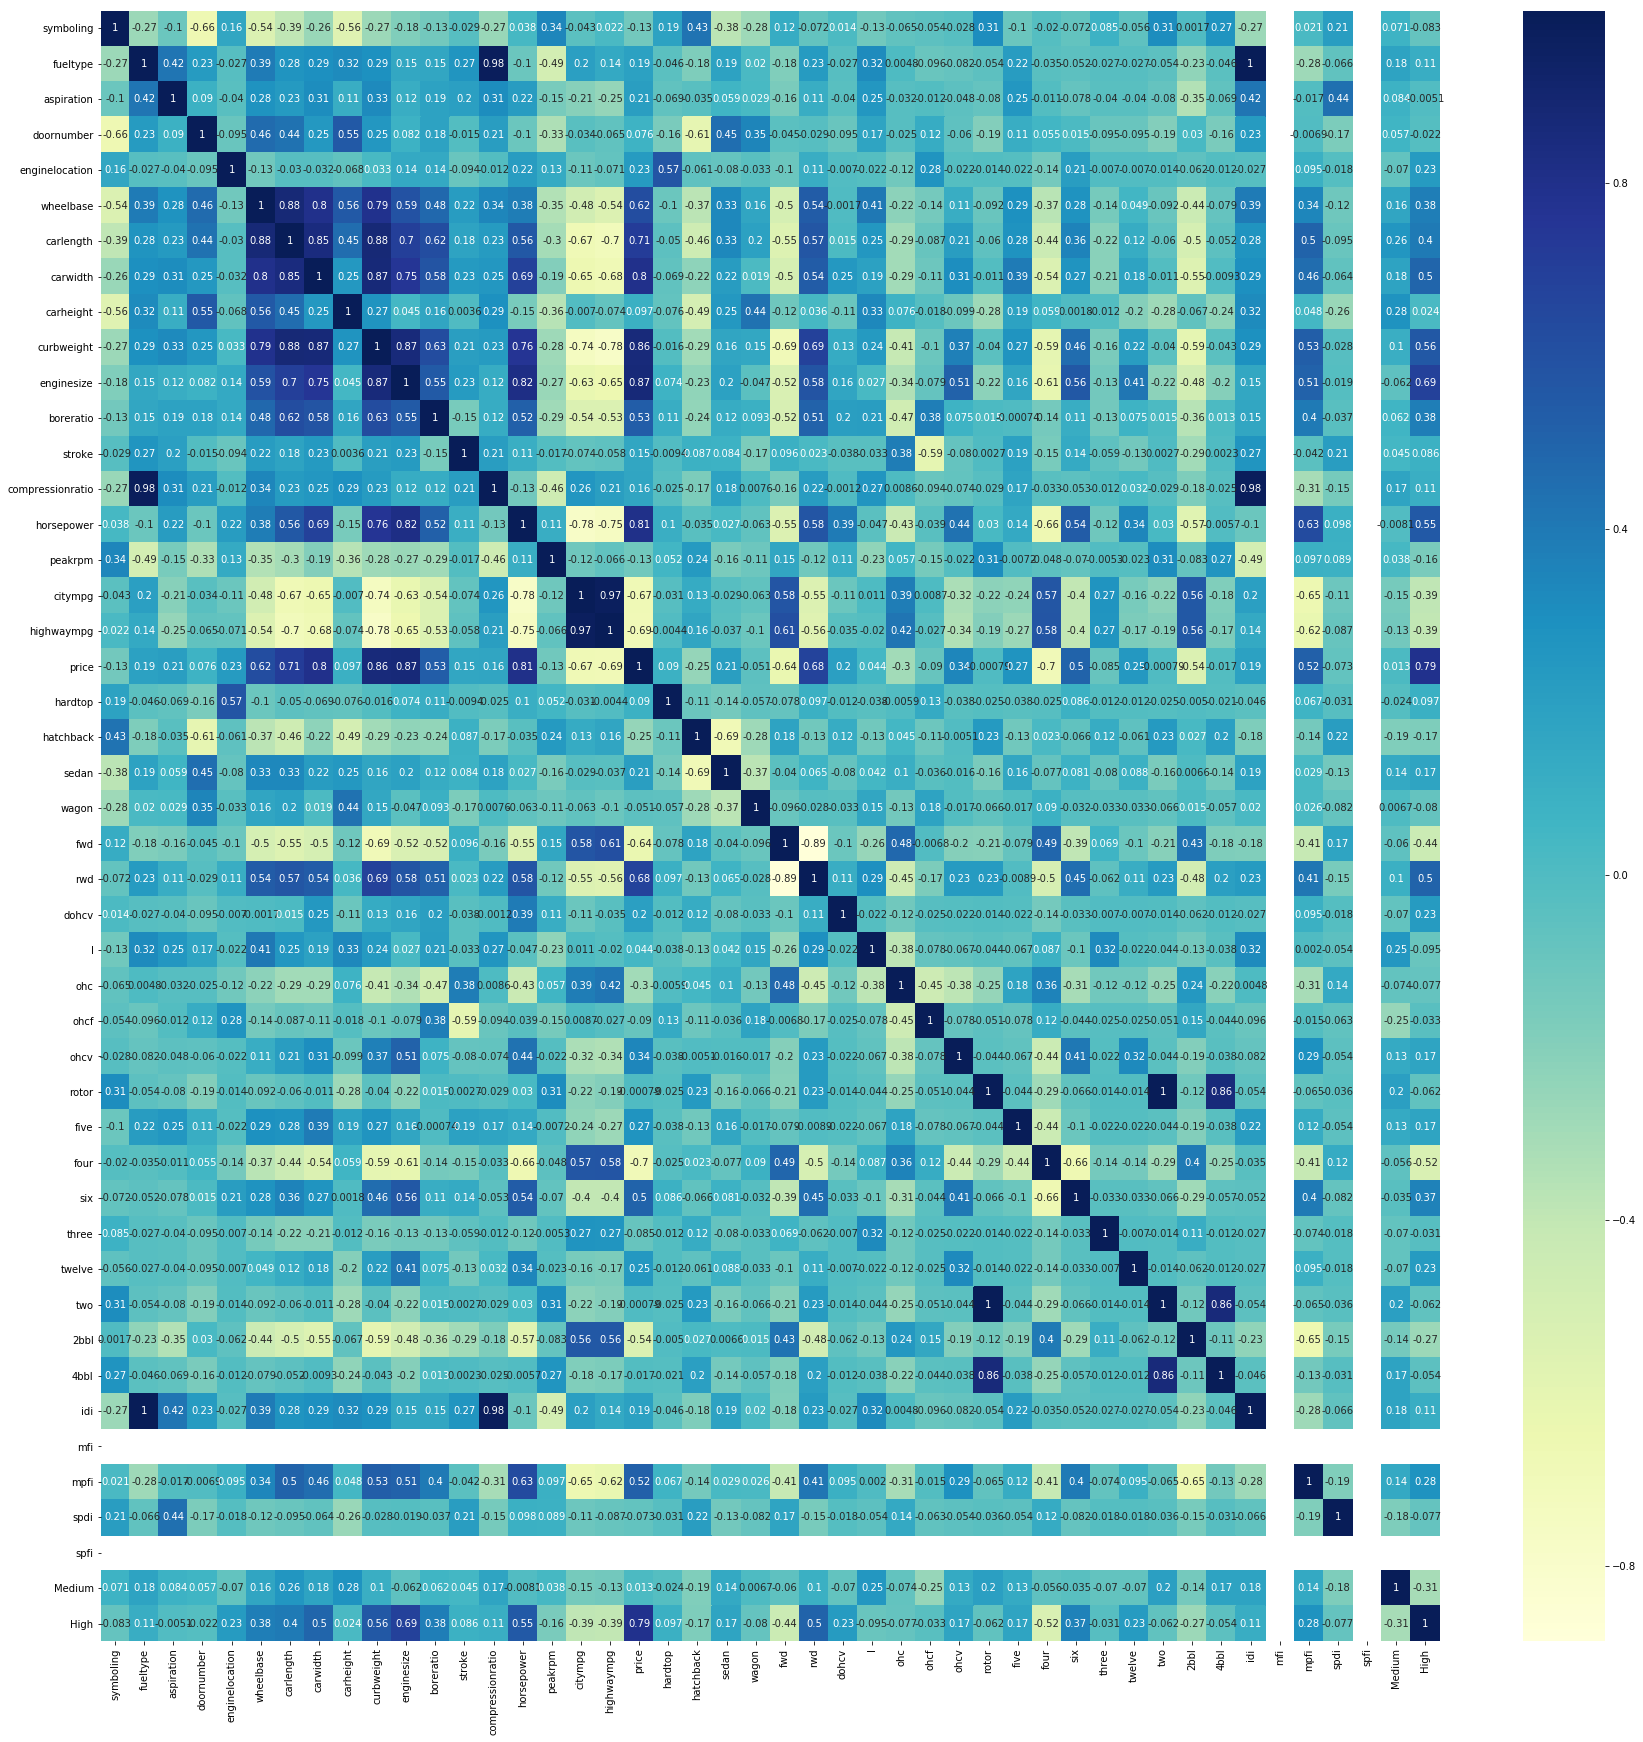

In [371]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [108]:
y_train = df_train.pop('price')
X_train = df_train

### Building model

In [109]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [110]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [111]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 26),
 ('fueltype', False, 6),
 ('aspiration', False, 14),
 ('doornumber', False, 28),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('carlength', False, 21),
 ('carwidth', True, 1),
 ('carheight', False, 19),
 ('curbweight', True, 1),
 ('enginesize', False, 2),
 ('boreratio', True, 1),
 ('stroke', False, 3),
 ('compressionratio', False, 18),
 ('horsepower', True, 1),
 ('peakrpm', False, 7),
 ('citympg', False, 13),
 ('highwaympg', False, 12),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 16),
 ('rwd', False, 27),
 ('dohcv', True, 1),
 ('l', False, 22),
 ('ohc', False, 5),
 ('ohcf', False, 9),
 ('ohcv', False, 11),
 ('rotor', False, 4),
 ('five', False, 20),
 ('four', False, 8),
 ('six', False, 29),
 ('three', True, 1),
 ('twelve', True, 1),
 ('two', True, 1),
 ('2bbl', False, 25),
 ('4bbl', False, 23),
 ('idi', False, 17),
 ('mfi', False, 30),
 ('mpfi', False, 24),
 ('spdi', False, 10),
 ('spfi'

In [112]:
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'wheelbase', 'carwidth', 'curbweight', 'boreratio',
       'horsepower', 'hardtop', 'hatchback', 'sedan', 'wagon', 'dohcv',
       'three', 'twelve', 'two', 'High'],
      dtype='object')

 ### Building statsmodel model using RFE support to get detailed stats

In [113]:
X_train_rfe = X_train[col]

In [114]:
import statsmodels.api as sm 

### Model 1

In [33]:
#X_train_new = build_model(X_train_rfe,y_train)
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     130.3
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           2.02e-69
Time:                        13:02:36   Log-Likelihood:                 216.91
No. Observations:                 143   AIC:                            -401.8
Df Residuals:                     127   BIC:                            -354.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0120      0.035      0.

In [34]:
X_train_new = X_train_rfe.drop(["twelve"], axis = 1)

### Model 2

In [35]:
X_train_new.columns

Index(['const', 'enginelocation', 'wheelbase', 'carwidth', 'curbweight',
       'boreratio', 'horsepower', 'hardtop', 'hatchback', 'sedan', 'wagon',
       'dohcv', 'three', 'two', 'High'],
      dtype='object')

In [36]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [37]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,curbweight,58.89
2,carwidth,44.04
1,wheelbase,28.55
5,horsepower,15.28
4,boreratio,11.47
8,sedan,6.44
7,hatchback,3.81
9,wagon,2.51
13,High,1.94
0,enginelocation,1.75


In [38]:
X_train_new = X_train_new.drop(["curbweight"], axis = 1)

### Model 3

In [39]:
X_train_new.columns

Index(['enginelocation', 'wheelbase', 'carwidth', 'boreratio', 'horsepower',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'dohcv', 'three', 'two',
       'High'],
      dtype='object')

In [40]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     139.5
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           3.00e-69
Time:                        13:04:56   Log-Likelihood:                 210.87
No. Observations:                 143   AIC:                            -393.7
Df Residuals:                     129   BIC:                            -352.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0403      0.035      1.

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,carwidth,38.18
1,wheelbase,20.57
3,boreratio,10.72
4,horsepower,8.28
7,sedan,5.80
6,hatchback,3.38
8,wagon,2.51
12,High,1.88
0,enginelocation,1.73
5,hardtop,1.69


In [42]:
X_train_new = X_train_new.drop(["carwidth"], axis = 1)

### Model 4

In [43]:
X_train_new.columns

Index(['enginelocation', 'wheelbase', 'boreratio', 'horsepower', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'dohcv', 'three', 'two', 'High'],
      dtype='object')

In [44]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     128.4
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           6.64e-66
Time:                        13:06:13   Log-Likelihood:                 199.54
No. Observations:                 143   AIC:                            -373.1
Df Residuals:                     130   BIC:                            -334.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0995      0.036      2.

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,wheelbase,10.43
2,boreratio,10.00
3,horsepower,6.06
6,sedan,5.45
5,hatchback,3.00
7,wagon,2.48
11,High,1.88
0,enginelocation,1.73
4,hardtop,1.69
8,dohcv,1.28


In [46]:
X_train_new = X_train_new.drop(["wheelbase"], axis = 1)

### Model 5

In [47]:
X_train_new.columns

Index(['enginelocation', 'boreratio', 'horsepower', 'hardtop', 'hatchback',
       'sedan', 'wagon', 'dohcv', 'three', 'two', 'High'],
      dtype='object')

In [48]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     76.86
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           1.31e-51
Time:                        13:09:22   Log-Likelihood:                 160.57
No. Observations:                 143   AIC:                            -297.1
Df Residuals:                     131   BIC:                            -261.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0625      0.046      1.

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,boreratio,9.03
2,horsepower,5.69
5,sedan,3.96
4,hatchback,2.68
6,wagon,1.95
10,High,1.78
3,hardtop,1.66
0,enginelocation,1.60
7,dohcv,1.22
9,two,1.10


In [50]:
X_train_new = X_train_new.drop(["boreratio"], axis = 1)

### Model 6

In [51]:
X_train_new.columns

Index(['enginelocation', 'horsepower', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'dohcv', 'three', 'two', 'High'],
      dtype='object')

In [52]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     83.08
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           5.68e-52
Time:                        13:09:57   Log-Likelihood:                 159.02
No. Observations:                 143   AIC:                            -296.0
Df Residuals:                     132   BIC:                            -263.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0900      0.044      2.

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,horsepower,4.52
4,sedan,2.12
3,hatchback,1.90
9,High,1.77
0,enginelocation,1.60
2,hardtop,1.54
5,wagon,1.27
6,dohcv,1.22
8,two,1.10
7,three,1.04


In [54]:
X_train_new = X_train_new.drop(["enginelocation"], axis = 1)

### Model 7

In [55]:
X_train_new.columns

Index(['horsepower', 'hardtop', 'hatchback', 'sedan', 'wagon', 'dohcv',
       'three', 'two', 'High'],
      dtype='object')

In [56]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     93.01
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           5.72e-53
Time:                        13:10:18   Log-Likelihood:                 159.02
No. Observations:                 143   AIC:                            -298.0
Df Residuals:                     133   BIC:                            -268.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0902      0.043      2.080      0.0

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,4.46
3,sedan,2.08
2,hatchback,1.89
8,High,1.73
4,wagon,1.27
5,dohcv,1.21
1,hardtop,1.10
7,two,1.10
6,three,1.04


In [58]:
X_train_new = X_train_new.drop(["sedan"], axis = 1)

### Model 8

In [59]:
X_train_new.columns

Index(['horsepower', 'hardtop', 'hatchback', 'wagon', 'dohcv', 'three', 'two',
       'High'],
      dtype='object')

In [60]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     103.8
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           1.34e-53
Time:                        13:10:40   Log-Likelihood:                 158.04
No. Observations:                 143   AIC:                            -298.1
Df Residuals:                     134   BIC:                            -271.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0349      0.015      2.365      0.0

In [484]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,horsepower,4.79
0,wheelbase,3.49
5,High,1.66
2,hatchback,1.44
3,dohcv,1.24
4,two,1.10


In [61]:
X_train_new = X_train_new.drop(["three"], axis = 1)

### Model 9

In [62]:
X_train_new.columns

Index(['horsepower', 'hardtop', 'hatchback', 'wagon', 'dohcv', 'two', 'High'], dtype='object')

In [63]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     119.3
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           1.30e-54
Time:                        13:11:48   Log-Likelihood:                 157.94
No. Observations:                 143   AIC:                            -299.9
Df Residuals:                     135   BIC:                            -276.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0355      0.015      2.422      0.0

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,2.46
6,High,1.71
2,hatchback,1.50
3,wagon,1.14
4,dohcv,1.12
5,two,1.10
1,hardtop,1.05


### Model 10

In [65]:
X_train_new = X_train_new.drop(["wagon"], axis = 1)

In [66]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     139.6
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           1.34e-55
Time:                        13:12:05   Log-Likelihood:                 157.68
No. Observations:                 143   AIC:                            -301.4
Df Residuals:                     136   BIC:                            -280.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0321      0.014      2.331      0.0

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,2.17
5,High,1.66
2,hatchback,1.45
3,dohcv,1.11
4,two,1.09
1,hardtop,1.05


### Model 11

In [68]:
X_train_new = X_train_new.drop(["hardtop"], axis = 1)

In [69]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     167.2
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           1.67e-56
Time:                        13:13:23   Log-Likelihood:                 157.12
No. Observations:                 143   AIC:                            -302.2
Df Residuals:                     137   BIC:                            -284.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0316      0.014      2.298      0.0

In [70]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,2.12
4,High,1.66
1,hatchback,1.44
2,dohcv,1.11
3,two,1.09


### Model 12

In [71]:
X_train_new = X_train_new.drop(["two"], axis = 1)

In [81]:
X_train_new.columns

Index(['horsepower', 'hatchback', 'dohcv', 'High'], dtype='object')

In [72]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     207.5
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           2.56e-57
Time:                        13:14:17   Log-Likelihood:                 156.22
No. Observations:                 143   AIC:                            -302.4
Df Residuals:                     138   BIC:                            -287.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0306      0.014      2.222      0.0

In [73]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,2.12
3,High,1.66
1,hatchback,1.37
2,dohcv,1.11


### Residual Analysis of the train data

In [74]:
y_train_price = lm.predict(X_train_lm)

In [75]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Errors')

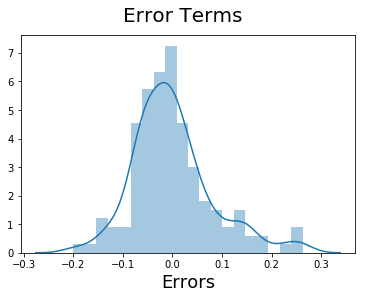

In [76]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Making Prediction

In [ ]:
##Apply scaling on test data set

In [79]:
num_vars = ['wheelbase', 'symboling', 'carlength', 'carwidth', 'carheight','curbweight','enginesize','boreratio','stroke',
          'compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

### Dividing into X_test and y_test

In [80]:
y_test = df_test.pop('price')
X_test = df_test

In [82]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [83]:
# Making predictions
y_pred = lm.predict(X_test_new)

### Model Evaluation

Text(0, 0.5, 'y_pred')

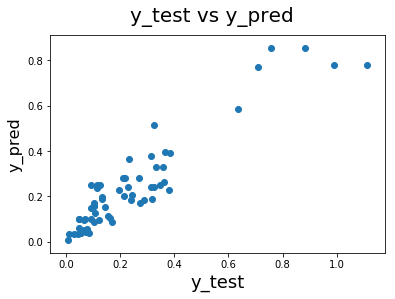

In [84]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

### Graph of the model is Linear

In [85]:
#calculate the R-squared score on the test set
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8608611965063023

#### 'horsepower', 'hatchback', 'dohcv', 'High' are the four predictors in the final model which can be used to predict the price of the car
#### r2 score of the final train model is 85.7 and r2 score of the test model is 86.08 which indicates the model is good and explains about 86% of the variance.
#### The train model were re iterated several times using RFE. In doing so first each variables p-value was checked and it it was high one variable was dropped then re evaluated.
#### After revaluation VIF of the model was calulated and if any variables were found greater than 5, then the variable with the highest feature was dropped and the module was evaluated again. 
#### In the final model the variables selected had p-value < 0.05 and VIF < 5 and r2 score of 85.8 which means it explins approximately 86% of variance. 

### Conclusion
#### Based on the above model we can conclude that horepower of the car, engine type dochv, hatchback carbody and companies like BMW, Jaguar, Buick, Porche which make high end luxury cars drive the price of the car in the US market 
#### Above variables is what Geely auto should focus on while entering the US market and pricing their car.